<a href="https://colab.research.google.com/github/450586509/practical-ml/blob/master/xgboost%E9%9D%9E%E5%B9%B3%E8%A1%A1%E6%A0%B7%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 结论
样本均衡的情况下最佳分位点是0.5
当样本不均衡时，0.5作为分位点可能不合适
可以同过roc计算寻找最佳分位点。

In [60]:

import matplotlib.pyplot as plt
 
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from collections import Counter
!pip install xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd


In [63]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.5], flip_y=0, random_state=7)
counter = Counter(y)
print(counter)

Counter({0: 5000, 1: 5000})


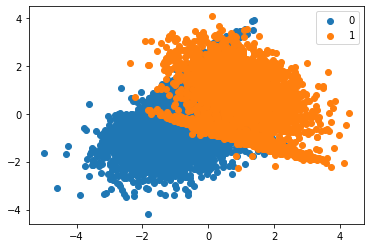

In [64]:
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [65]:
model = XGBClassifier(scale_pos_weight=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.96969


In [66]:
from sklearn import metrics

def find_optimal_cutoff(target, predicted):
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf': pd.Series(tpr - (1 - fpr), index=i), 'threshold': pd.Series(threshold, index=i)})
    #roc_t = roc.ix[(roc.tf - 0).abs().argsort()[:1]]
    v = (roc.tf - 0).abs().argsort()[:1]
    print(type(v))
    print(f"v={v}")
    roc_t = roc.iloc[(roc.tf - 0).abs().argsort()[:1]]
    return list(roc_t['threshold'])


In [67]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [68]:
scores = pd.Series([s1 for s0, s1 in model.predict_proba(X)])
scores = np.asarray(scores)

In [72]:
threds = find_optimal_cutoff(target=y, predicted=scores)
threshold = threds[0]

<class 'pandas.core.series.Series'>
v=0    683
Name: tf, dtype: int64


In [73]:
#threshold=0.5
print(f"threshold={threshold}")
preds = np.where(scores > threshold, 1, 0)
p = metrics.precision_score(y, preds)
r = metrics.recall_score(y, preds)
print(f"p={p}\tr={r}")
# threshold=0.730 p=0.23414634146341465	r=0.96
# threshold=0.0207 p=0.10823529411764705	r=0.92
#不加scale_pos_weight threshold=0.5 p=0.8611111111111112	r=0.31
#加scale_pos_weight threshold=0.5 p=0.15748031496062992	r=1.0
# 样本均衡的情况下：

threshold=0.5164316296577454
p=0.9173669467787114	r=0.917


In [71]:
for i,(j,k,s) in enumerate(zip(y, preds, scores)):
  if i >=20 and k !=1:
    continue
  print(j, k, round(s, 5))
    

流式输出内容被截断，只能显示最后 5000 行内容。
1 1 0.61977
1 1 0.66669
1 1 0.98115
1 1 0.98797
1 1 0.98167
1 1 0.964
1 1 0.98648
0 1 0.83559
1 1 0.83773
1 1 0.97368
0 1 0.88653
1 1 0.98119
1 1 0.98656
1 1 0.98359
1 1 0.98607
1 1 0.64522
0 1 0.56143
1 1 0.94879
1 1 0.61495
1 1 0.8853
1 1 0.97515
1 1 0.97274
1 1 0.97765
0 1 0.62927
1 1 0.99137
1 1 0.91596
1 1 0.9882
0 1 0.63656
1 1 0.97765
1 1 0.93682
1 1 0.82285
1 1 0.9882
1 1 0.96097
1 1 0.98359
1 1 0.899
1 1 0.97987
1 1 0.96801
1 1 0.92022
1 1 0.98607
1 1 0.91061
1 1 0.98468
1 1 0.90373
1 1 0.92796
1 1 0.98359
1 1 0.85932
1 1 0.66073
1 1 0.98359
1 1 0.89713
1 1 0.96097
1 1 0.98958
1 1 0.98971
1 1 0.97184
1 1 0.99664
1 1 0.9882
1 1 0.99041
1 1 0.97765
1 1 0.96064
1 1 0.98468
1 1 0.89832
1 1 0.75284
1 1 0.99057
1 1 0.98359
1 1 0.99743
1 1 0.964
1 1 0.98115
1 1 0.96531
1 1 0.85687
1 1 0.99501
1 1 0.91655
1 1 0.72606
1 1 0.96531
1 1 0.96531
1 1 0.56781
1 1 0.98359
0 1 0.5057
1 1 0.98797
1 1 0.90445
1 1 0.76159
1 1 0.8981
1 1 0.98656
1 1 0.95198
1 1 0.90053
1